1 Cryptocurrency: Proof of Work versus Proof of Stake

Consider a block chain simulation where there are five nodes. Time is discrete, with 100 periods.
There is a random number of transactions of a random amount in each period (Hint: although you’ll
notice this doesn’t matter that much). Consider the block chain code in github.com/acarril/
paynecoin.

(a) How would you implement proof of stake? Describe conceptually what would change, and
implement the solution in the code currently in the repository, highlighting the necessary
changes to the code.

To implement proof of stake, instead of using a hash puzzle to determine which node gets the right to add the new block to the blockchain, we have the nodes put in a certain amount of the cryptocurrency to serve as a "stake" to ensure security and credibility. Then, the algorithm will choose the node who has staked the most to allow them to add the next block to the blockchain: if an error is found, then the node who added the block loses their staked currency. 

As for the modifying the actual code in the repository, the following locations will need to be modified: 

1. mine() in api.py: 
The mining operation is going to be different since there is no proof of work involved. Therefore, we must delete all the parts of the code that involves proof of work. The resulting mine function will look something like this: 

In [ ]:
def mine():
    # Gets the last block in the blockchain
    last_block = blockchain.last_block
    
    previous_hash = blockchain.hash(last_block)
    block = blockchain.new_block(previous_hash) # Proof is no longer needed

    response = {
        'message': "New Block Forged",
        'index': block['index'],
        'transactions': block['transactions'],
        'proof': block['proof'],
        'previous_hash': block['previous_hash'],
    }
    return jsonify(response), 200

2. new_block in blockchain.py: 
The process of creating a new block will differ in our blockchain.py, since there is no proof of work involved: in addition, we must implement the logic involved in proof of stake. The resulting new block code is shown below: 

In [ ]:
def new_block(self, proof, previous_hash):
        """
        Create a new Block in the Blockchain
        :param proof: The proof given by the Proof of Stake algorithm
        :param previous_hash: Hash of previous Block
        :return: New Block
        """
        
        # Determines the miner
        miner = self.determine_miner()
        
        block = {
            'index': len(self.chain) + 1,
            'timestamp': time(),
            'transactions': self.current_transactions,
            'total_transactions': sum([x.get('amount') for x in self.current_transactions]),
            #'proof': proof, Proof is commented out since it isn't technically a thing 
            'previous_hash': previous_hash or self.hash(self.chain[-1]),
            'miner': miner # Add the miner to the block so if the node is determined to be false later, we can punish the miner
            # In addition, we must also reward the miner with the fees if the mining succeeds
        }

        # Reset the current list of transactions
        self.current_transactions = []

        self.chain.append(block)
        return block

3. determine_miner additional function: 
This function determines the miner through the proof of stake algorithm: the process is simulated in the following code since it would be too tedious for every single node to input their stake, so I just randomly generated their stake:

In [ ]:
def determine_miner(self):
    stake = []
    for i in range(len(self.nodes)):
        stake.append(randInt(0, 10))
    
    # Randomly chooses the miner with weight probabitilies with respect to the stake
    randNum = rand
    totalSum = sum(stake)
    cumSum = 0.0
    counter = 0
    for i in range(len(self.nodes)): 
        if ((cumSum / totalSum) > randNum):
            return node
        else:
            cumSum += stake[counter]
            counter += 1
    
    # If for some reason it cannot choose a node, return the first one arbitrarily
    return self.nodes[0]

4. valid_chain:
We need to change this function in blockchain.py, since no longer is it checking whether a chain is valid based on its proof, but rather we need to check that the miner specified is the actual one doing the mining:

In [ ]:
def valid_chain(self, chain):

    last_block = chain[0]
    current_index = 1

    while current_index < len(chain):
        block = chain[current_index]
        print(f'{last_block}')
        print(f'{block}')
        print("\n-----------\n")
        # Check that the hash of the block is correct
        last_block_hash = self.hash(last_block)
        if block['previous_hash'] != last_block_hash:
            return False

        # Check that the Proof of Stake is correct
        if block['miner'] == null:
            return False

        last_block = block
        current_index += 1

    return True

5. Consensus Algorithm: (resolve_conflicts() in blockchain.py)
In addition (implemented omitted here), we would need to implement the part of proof of stake which punishes the miner that inputs an incorrect block (if an incorrect block is found): basically, the stake that the miner put in will need to be removed. However, if the block is validated into the chain, then we tally the transaction fees (gas fees) and give it to the miner, whose node address is specified in the block. 

NOTE: There a few edge cases that I can think of that aren't accounted for here, but due to the lack of public private keys this really isn't an issue for this blockchain: One example is in the resolve-conflicts function, if a miner is determined to have falsified a block, we should have additional backup miners to count on, which is not implemented here. 

b) Repeat the simulation from Q2 (c) in homework 4 using proof of stake. Compute and plot the same metrics. How are they different to proof of work, and why?

We notice that in our plot here, the average time it takes on the y axis drastically decreases in comparison to the previous suggested proof of work protocol. (In addition to it being constant) They are different because proof of stake doesn't require nearly as much computational power in comparison to proof of work, due to the lack of a mining puzzle, which took up the majority of the time taken in the previous simulation. The plot is shown below: 

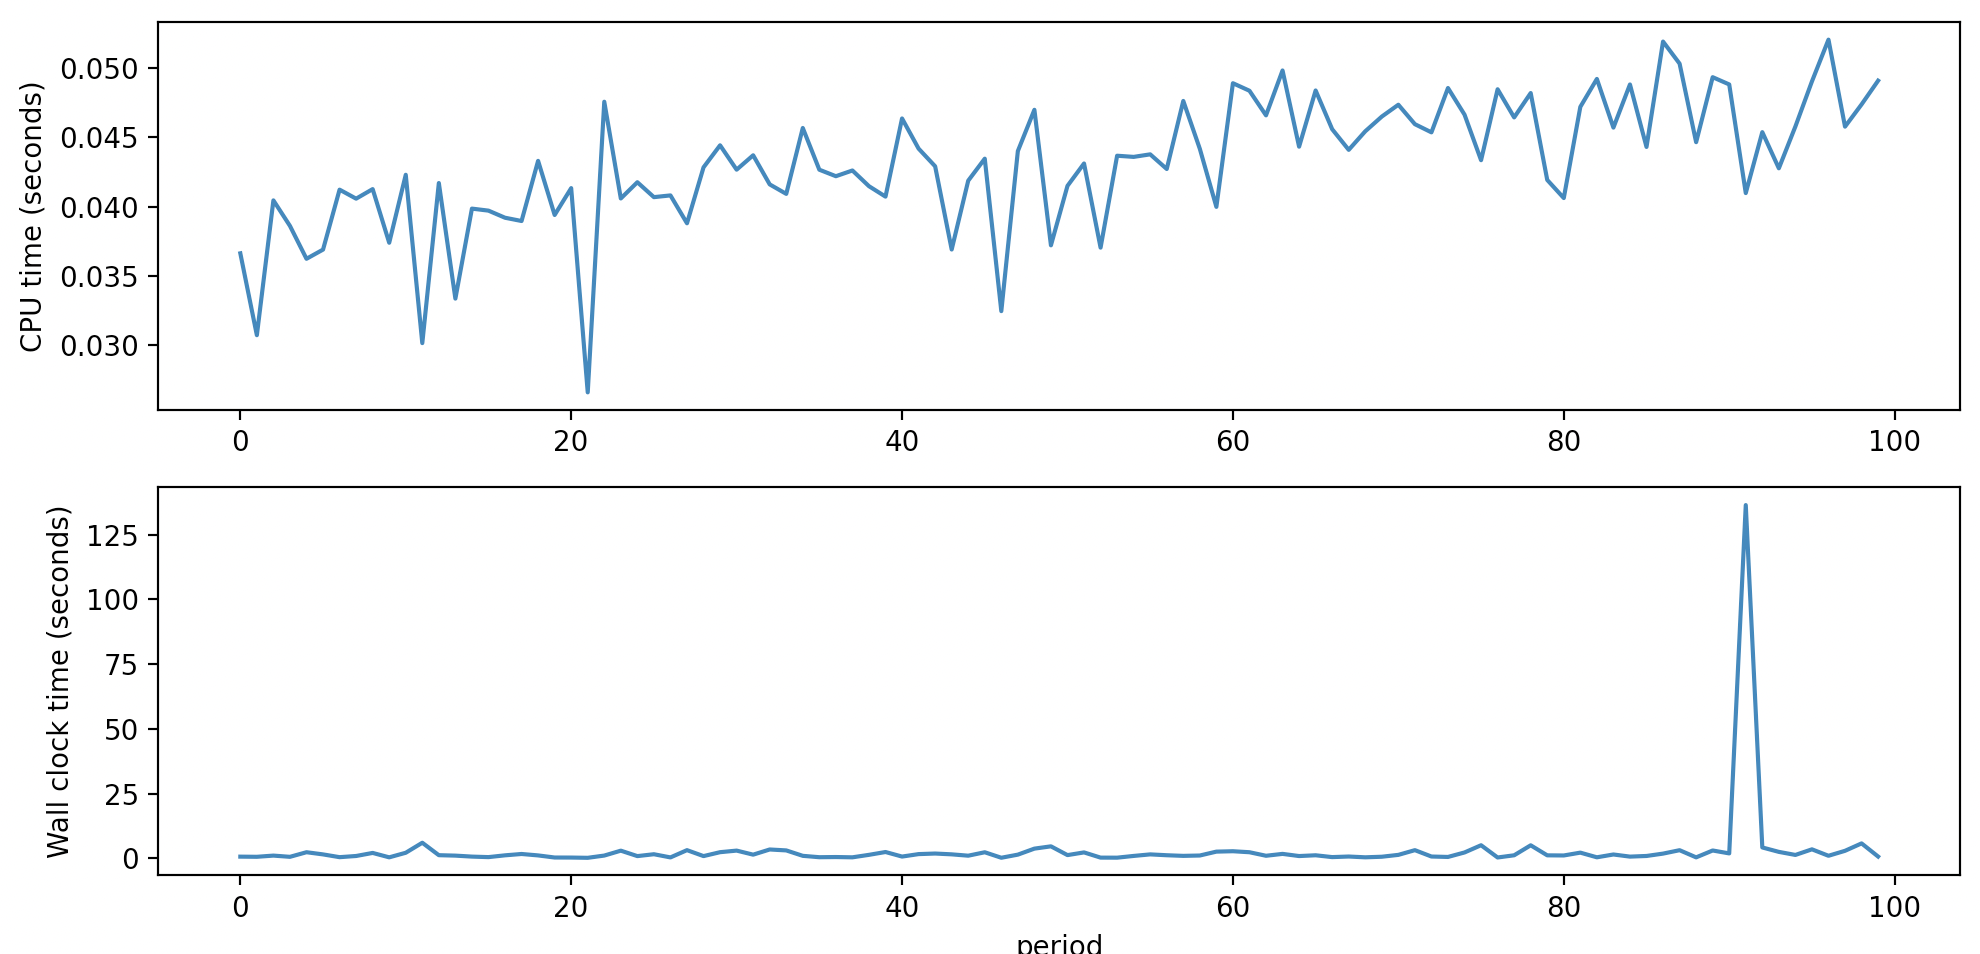

(P.S: I have absolutely no idea what happened with the peak in the wall time, maybe my computer just had a mental boom or something)

c) The above should highlight a strength of proof-of-stake protocols. Identify a weakness of our suggested protocol. What is a possible amendment to the protocol that can resolve that issue?

Assuming that when the question states "suggested protocol," it is referring to the old consensus protocol involving proof of work: 
A weakness in our suggested protocol is that it wastes a lot of computational power performing a relatively useless computation, which unnecessarily wastes a lot of resources: in addition, as the mining difficulty increases, it becomes more likely for the mining to become extremely centralized on extremely powerful cpus owned by a few centralized miners. This makes a cryptocurrency more susceptible to 51% attacks. One possible amendment to this protocol is to design a mining puzzle that is memory hard rather than CPU-hard: this will reduce the gap between customized CPUs for mining and typical computer hardware. 

2 Cryptocurrency Private and Public Keys
In this question we consider the need for public-key cryptography in blockchains. Consider the block chain code in github.com/acarril/paynecoin.

A) Why is there a need for public and private keys? What attacks would be possible if a blockchain had no keys at all? What if it only had a symmetric key?

The general purpose of keys is to validate users: to make sure that we are able to securely attribute transactions to specific users without a fear of the transaction being only desired by one out of the two parties, or none of the two parties. If a blockchain had no keys at all, anyone would be free to add in fake transactions without the consent of the users involved in the transactions. If a blockchain only had a symmetric key (a secret key), it creates the possibility that if the channel in which the secret key is shared gets compromised/hacked, other people may have access to the secret key, which allows them to sign off on transactions on your behalf. 

B) Create a script that implements a simple attack based on the lack of public-key cryptography.

In [ ]:
# Specifies a specific sender, recipient, and amount that isn't actually verified
sender = nodes_uuids[0] # Predetermined sender
recipient = nodes_uuids[1] # Predetermined recipient
amount = 10

# Creates a fake transaction that isn't authorized by either of the users
req_endpoint(
        '/transaction',
        data=transaction = {
        'sender': sender,
        'recipient': recipient,
        'amount': amount
    }
)

# sets the miner randomly, this part doesn't really matter since the transaction appears to be verified anyways
miner = nodes_uuids[0]

# Mines the block
req_endpoint(
        '/mine',
        port=nodes_dict.get(miner)
    )

# Resolves with consensus: The unauthorized block is now in the blockchain, successfully completing the attack
for node_port in nodes_dict.values():
        req_endpoint('/nodes/resolve', port=node_port)

C) Describe the changes that would have to be done to the code in the repository to implement public-key cryptography.

To implement public key cryptography, first we would have to implement several functions within the blockchain.py to support the checking of keys within the transaction function, in addition to the generation of keys:

1. generateKeys():
This function would generate a public and private key pair to be used by a particular node to encrypt transacitons. We can use the same algorithm that Bitcoin uses to generate their pairs, the Elliptic Curve Digitial Signature Algorithm. 
2. sign(sk, message):
This function would take a message and secret key, and output a signature, by encrypting the message with the secret key. 
3. verify(pk, message, sig):
This function would take a public key, the message, and the signature, and verify that the signature is valid by attempting to 

After implementing these three functions, we would have to call generateKeys every time we create a new node. When we perform a transaction, we would also need a digital signature to verify that the transaction is valid, so the function transaction in api.py would also need an additional parameter to take in this signature (the signature would be generated in the simulation before calling the transaction function to ensure the security of the secret key). Then, within the transaction function in api.py, we would need to verify this signature by calling the verify function with the public key of the sender, along with the transaction as the "message" before actually performing the transaction: if this verification fails, then the transaction stops there and no further code is executed. In addition, it would also be good to add the signature onto the block. 

3 Stablecoins
Consider a cryptocurrency implemented in github.com/acarril/paynecoin, which initially has a fixed mining reward of $1. Throughout this question, use the following specification of money demand. Let real money demand be denoted by
γt =Aeμte−12σ2εt, where log(εt) is a normally distributed random variable with mean 0 and variance σ2. Under this specification, money demand grows at rate μ with i.i.d. normal shocks around the mean growth rate. The mean is E[γt] = Aeμt. Let money supply be denoted by Mt. Then, we have that the price level can be derived from money market clearing,
γt = Mt Pt
=⇒ Pt = Mt . γt
For all simulations consider discrete time with 100 periods.

1. Simulate demand with trend growth and i.i.d. fluctuations (hint: set simple/sensible values for unknown parameters). Simulate money supply (hint: you don’t need to simulate blockchain transactions). Compute and plot prices for each period.

Text(0, 0.5, 'Prices')

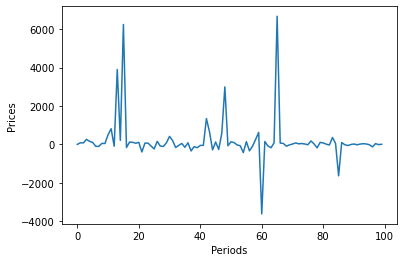

In [102]:
import numpy as np
import matplotlib.pyplot as plt

# Let us set sensible values for unknown parameters: Set mu to be 0.2, and A to be 1. 
A = 1
mu = 0.05
# For the demand shocks, since they are iid from normal distribution, let us take 100 samples from the normal distribution:
eta_t = []
for i in range(100):
    # mean is 0 and the sigma (SD) is 1
    eta_t.append(np.random.normal(loc=0, scale=1))

# Simulating demand changes
demand = []
for i in range(100):
    demand.append(A * np.exp(mu * i) * np.exp(-0.5) * eta_t[i])
    
# Simulating supply changes: let us assume that there is initially no cryptocurrency, and in every single mining
# period, there is 10 blocks mined: therefore, the money supply goes up by 10 every single period. 
money_supply = [0]
for i in range(1, 100):
    money_supply.append(money_supply[i-1] + 10)
    
price = np.array(money_supply) / np.array(demand)
plt.plot(range(100), price)
plt.xlabel("Periods")
plt.ylabel("Prices")

2. Can you set a fixed mining reward such that the price is stable in trends? Explain. What is your answer if you can set an arbitrary schedule for reward in each period? Implement and plot a solution that stabilizes price in trend.

You cannot set a fixed mining reward such that the price of stable in trends: this is because with a fixed mining reward, the money supply is increasing at a relatively constant rate due to the fixed mining reward (not completely constant due to potential variability in amount of mining, while the money demand is not increasing at the same constant rate due to potential demand shocks. This means that should a demand shock hit to decrease demand, the money supply will not be able to adjust to account for the big decrease/increase in demand, therefore, the price would not be stable.

However, theoretically you can do so with an arbitrary schedule for reward in each period: If you want the price to be stable, you would need to modify the money supply with the previous price. Although there isn't a good way to decrease the money supply, you can certainly modify the increase of it: by decreasing/increase the mining reward, you can decrease/increase the change in money supply. (If "negative" mining rewards were allowed, I guess you could also decrease money supply, although that wouldn't be particularly feasible). Therefore, with the new mining reward, we can somewhat temper the previous changes in price so that it becomes less volatile: this is assuming we have no knowledge of the actual demand shocks.

Plotting such a solution: 

Text(0, 0.5, 'Prices')

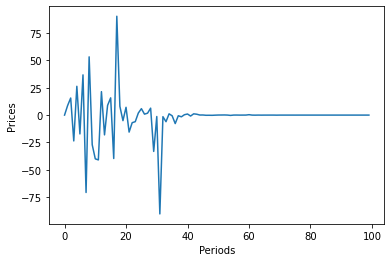

In [94]:
# For the demand shocks, since they are iid from normal distribution, let us take 100 samples from the normal distribution:
eta_t = []
for i in range(100):
    # mean is 0 and the sigma (SD) is 1
    eta_t.append(np.random.normal(loc=0, scale=1))

# Simulating demand changes
demand = []
for i in range(100):
    demand.append(A * np.exp(mu * i) * np.exp(-0.5) * eta_t[i])
    
# Simulating supply changes: This time: we change the mining reward with respect to the previous price: we 
# can calculate the change of mining_reward needed through the formula
money_supply = [0]
price = [1]
mining_reward = 1
sd = 1
for i in range(1, 100):
    money_supply.append(money_supply[i-1] + 10)
    price.append(money_supply[i] / demand[i])
    mining_reward = price[i] * demand[i] / 10
            
price = np.array(money_supply) / np.array(demand)
plt.plot(range(100), price)
plt.xlabel("Periods")
plt.ylabel("Prices")

# Note that the prices are a lot more stable: the range within the y axis is alot more stable than the previous one

3. Suppose that we know the demand shock εt one period in advance. Now set a mining reward schedule to eliminate all volatility in the price, plotting your result. Briefly explain

If we know the demand shock eta_t one period in advance, that means we can adjust the mining reward of the period where the demand shock hits to decrease/increase to preserve the price, before adjusting it back to normal assuming that the demand will revert back to the mean. (We should increase it when the demand increases, decrease it when the demand decreases since they are directly proportional to one another) Representing this in a plot:

Text(0, 0.5, 'Prices')

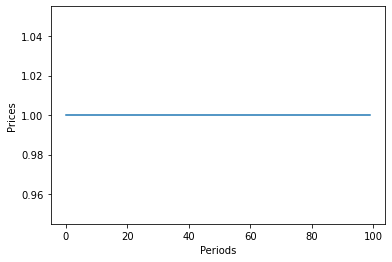

In [109]:
# For the demand shocks, since they are iid from normal distribution, let us take 100 samples from the normal distribution:
eta_t = []
for i in range(100):
    # mean is 0 and the sigma (SD) is 1
    eta_t.append(np.random.normal(loc=0, scale=1))

# Simulating demand changes
demand = []
for i in range(100):
    demand.append(A * np.exp(mu * i) * np.exp(-0.5) * eta_t[i])
    
# Simulating supply changes: This time: we change the mining reward with respect to the demand shock one period in
# advance. We still assume there are 10 blocks mined per period
money_supply = [demand[0]]
mining_reward = demand[0] / 10
sd = 1
for i in range(1, 100):
    # Sets the mining_reward with respect to the determined future demand
    money_supply.append(money_supply[i-1] + mining_reward * 10)
    if i < 99:
        mining_reward = (demand[i+1] - money_supply[i]) / 10

price = np.array(money_supply) / np.array(demand)
plt.plot(range(100), price)
plt.xlabel("Periods")
plt.ylabel("Prices")

# NOTE: This is done under the assumption that you can have negative mining_rewards, which in all reality doesn't 
# make that much sense. I wanted to add another line of code that sets the mining reward to 0 if it was ever 
# needed to be negative, but since the question said to eliminate all volatility, I allowed it to be negative.

4. Suppose that we don’t know εt in advance but it is mean reverting. To what extent can the price be stabilized? Discuss what can go wrong with this approach.

If we don't know eta_t but it is mean reverting, we can assume that on average, the demand shock will hover around the mean: which means that even if there is a negative demand shock, we can expect a positive one to balance it out. If this is the case, then we can assume a relatively constant mining reward, and fix the mining reward to be reflective on previous price changes. Through this, we should be able to obtain a relatively stable price.

However, the issue is that even though eta_t is mean reverting, we cannot predict whether the demand will ever reach the two extremes: since it is sampled iid from normal distribution, which contains extremes, albeit with very low possibilities. If we allow complete freedom in the changing of mining rewards to reflect price changes, there will be occasions where we must fix the mining reward to be very very low to adjust the money supply to stabilize the price. The issue with this is that with a very very low mining reward, and a proof of work algorithm, miners will lose incentive to mine for blocks, seeing as their input isn't receiving the reward that it should be getting. Therefore, the functioning of the cryptocurrency/blockchain may be at stake due to the lack of willing miners.